<a href="https://colab.research.google.com/github/poonampal/AIML/blob/main/Auto_MPG_Data_Set_Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auto MPG Data Set** - Regression Problem

In [177]:
import tensorflow as tf

In [178]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split 


In [179]:
# read dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [180]:
raw_dataset.shape

(398, 8)

In [181]:
df = raw_dataset.copy()

In [182]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [183]:
# check missing values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [184]:
df[df['Horsepower'].isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [185]:
df = df.dropna()

In [186]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Horsepower column have missing values which need to be imputed we will cover it later in datacleaning process

In [187]:
df.duplicated().sum()

0

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


origin column is categorical

In [189]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Univariant Analysis**

In [190]:
import seaborn as sns

In [191]:
def univariantGraph(df):
  num_columns = df.select_dtypes(include=np.number).columns
  for col in num_columns:
    fig, (ax1,ax2) = plt.subplots(2)
    sns.histplot(data=df, x=col, ax=ax1)
    sns.boxplot(data=df,x=col, ax=ax2)
  plt.show() 

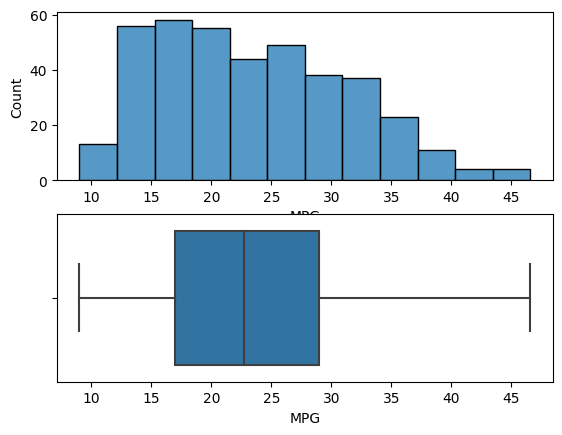

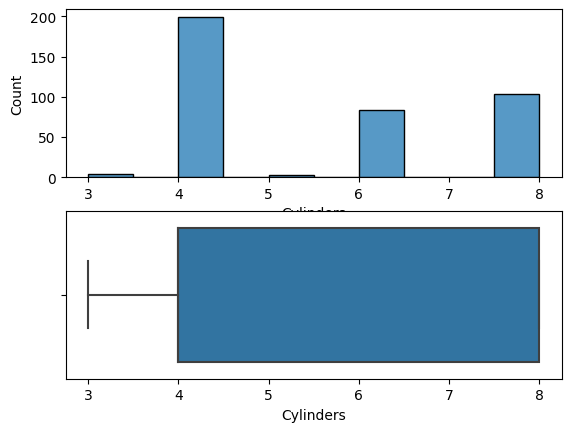

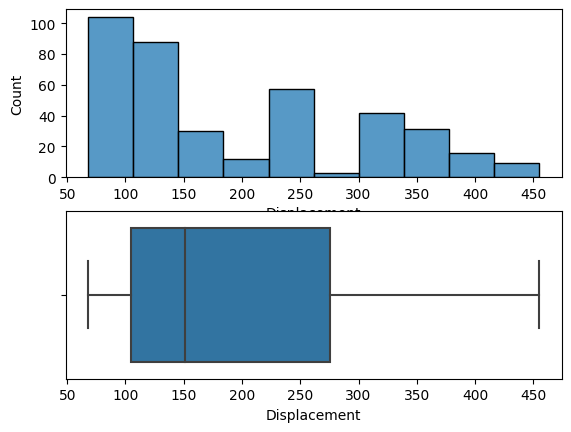

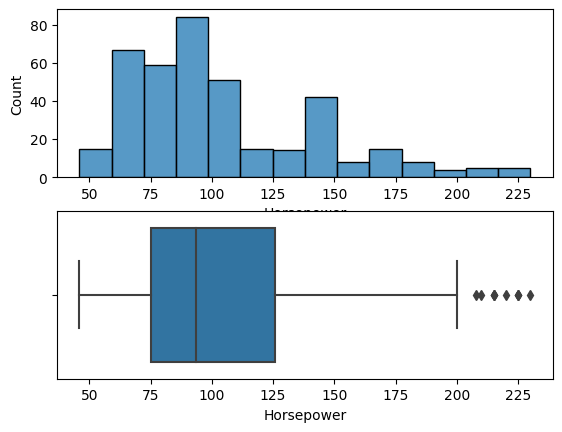

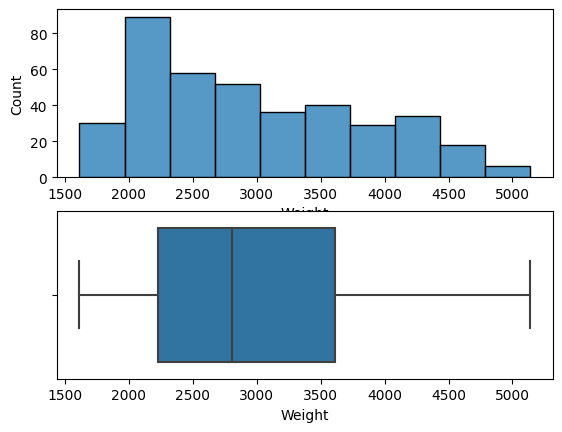

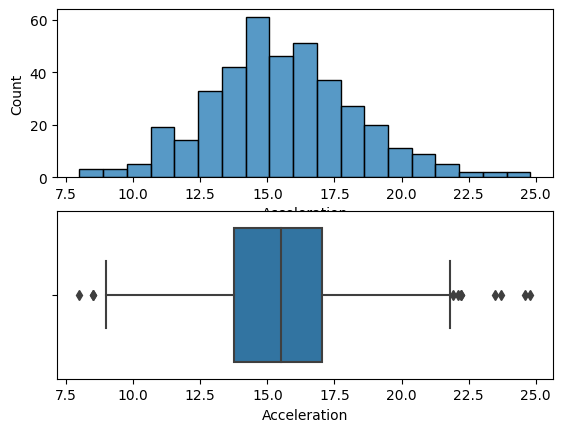

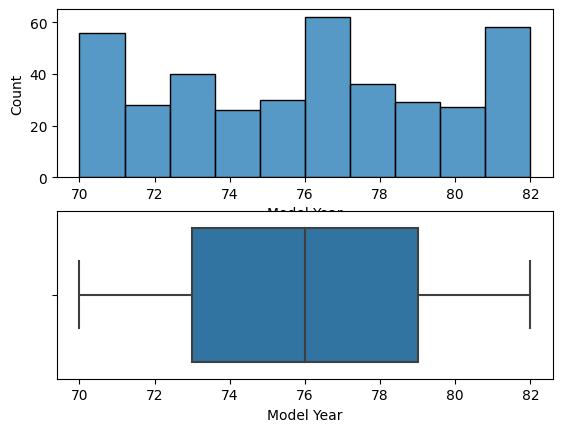

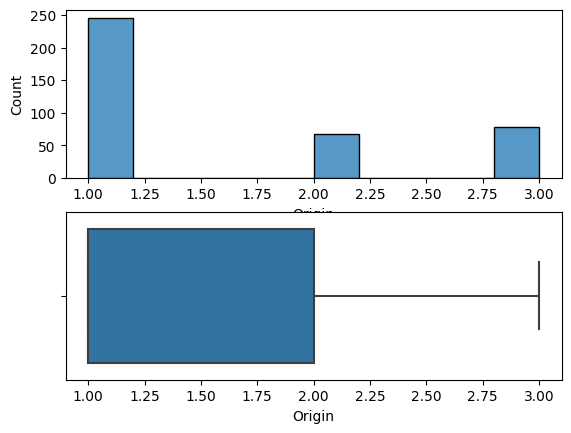

In [192]:
univariantGraph(df)

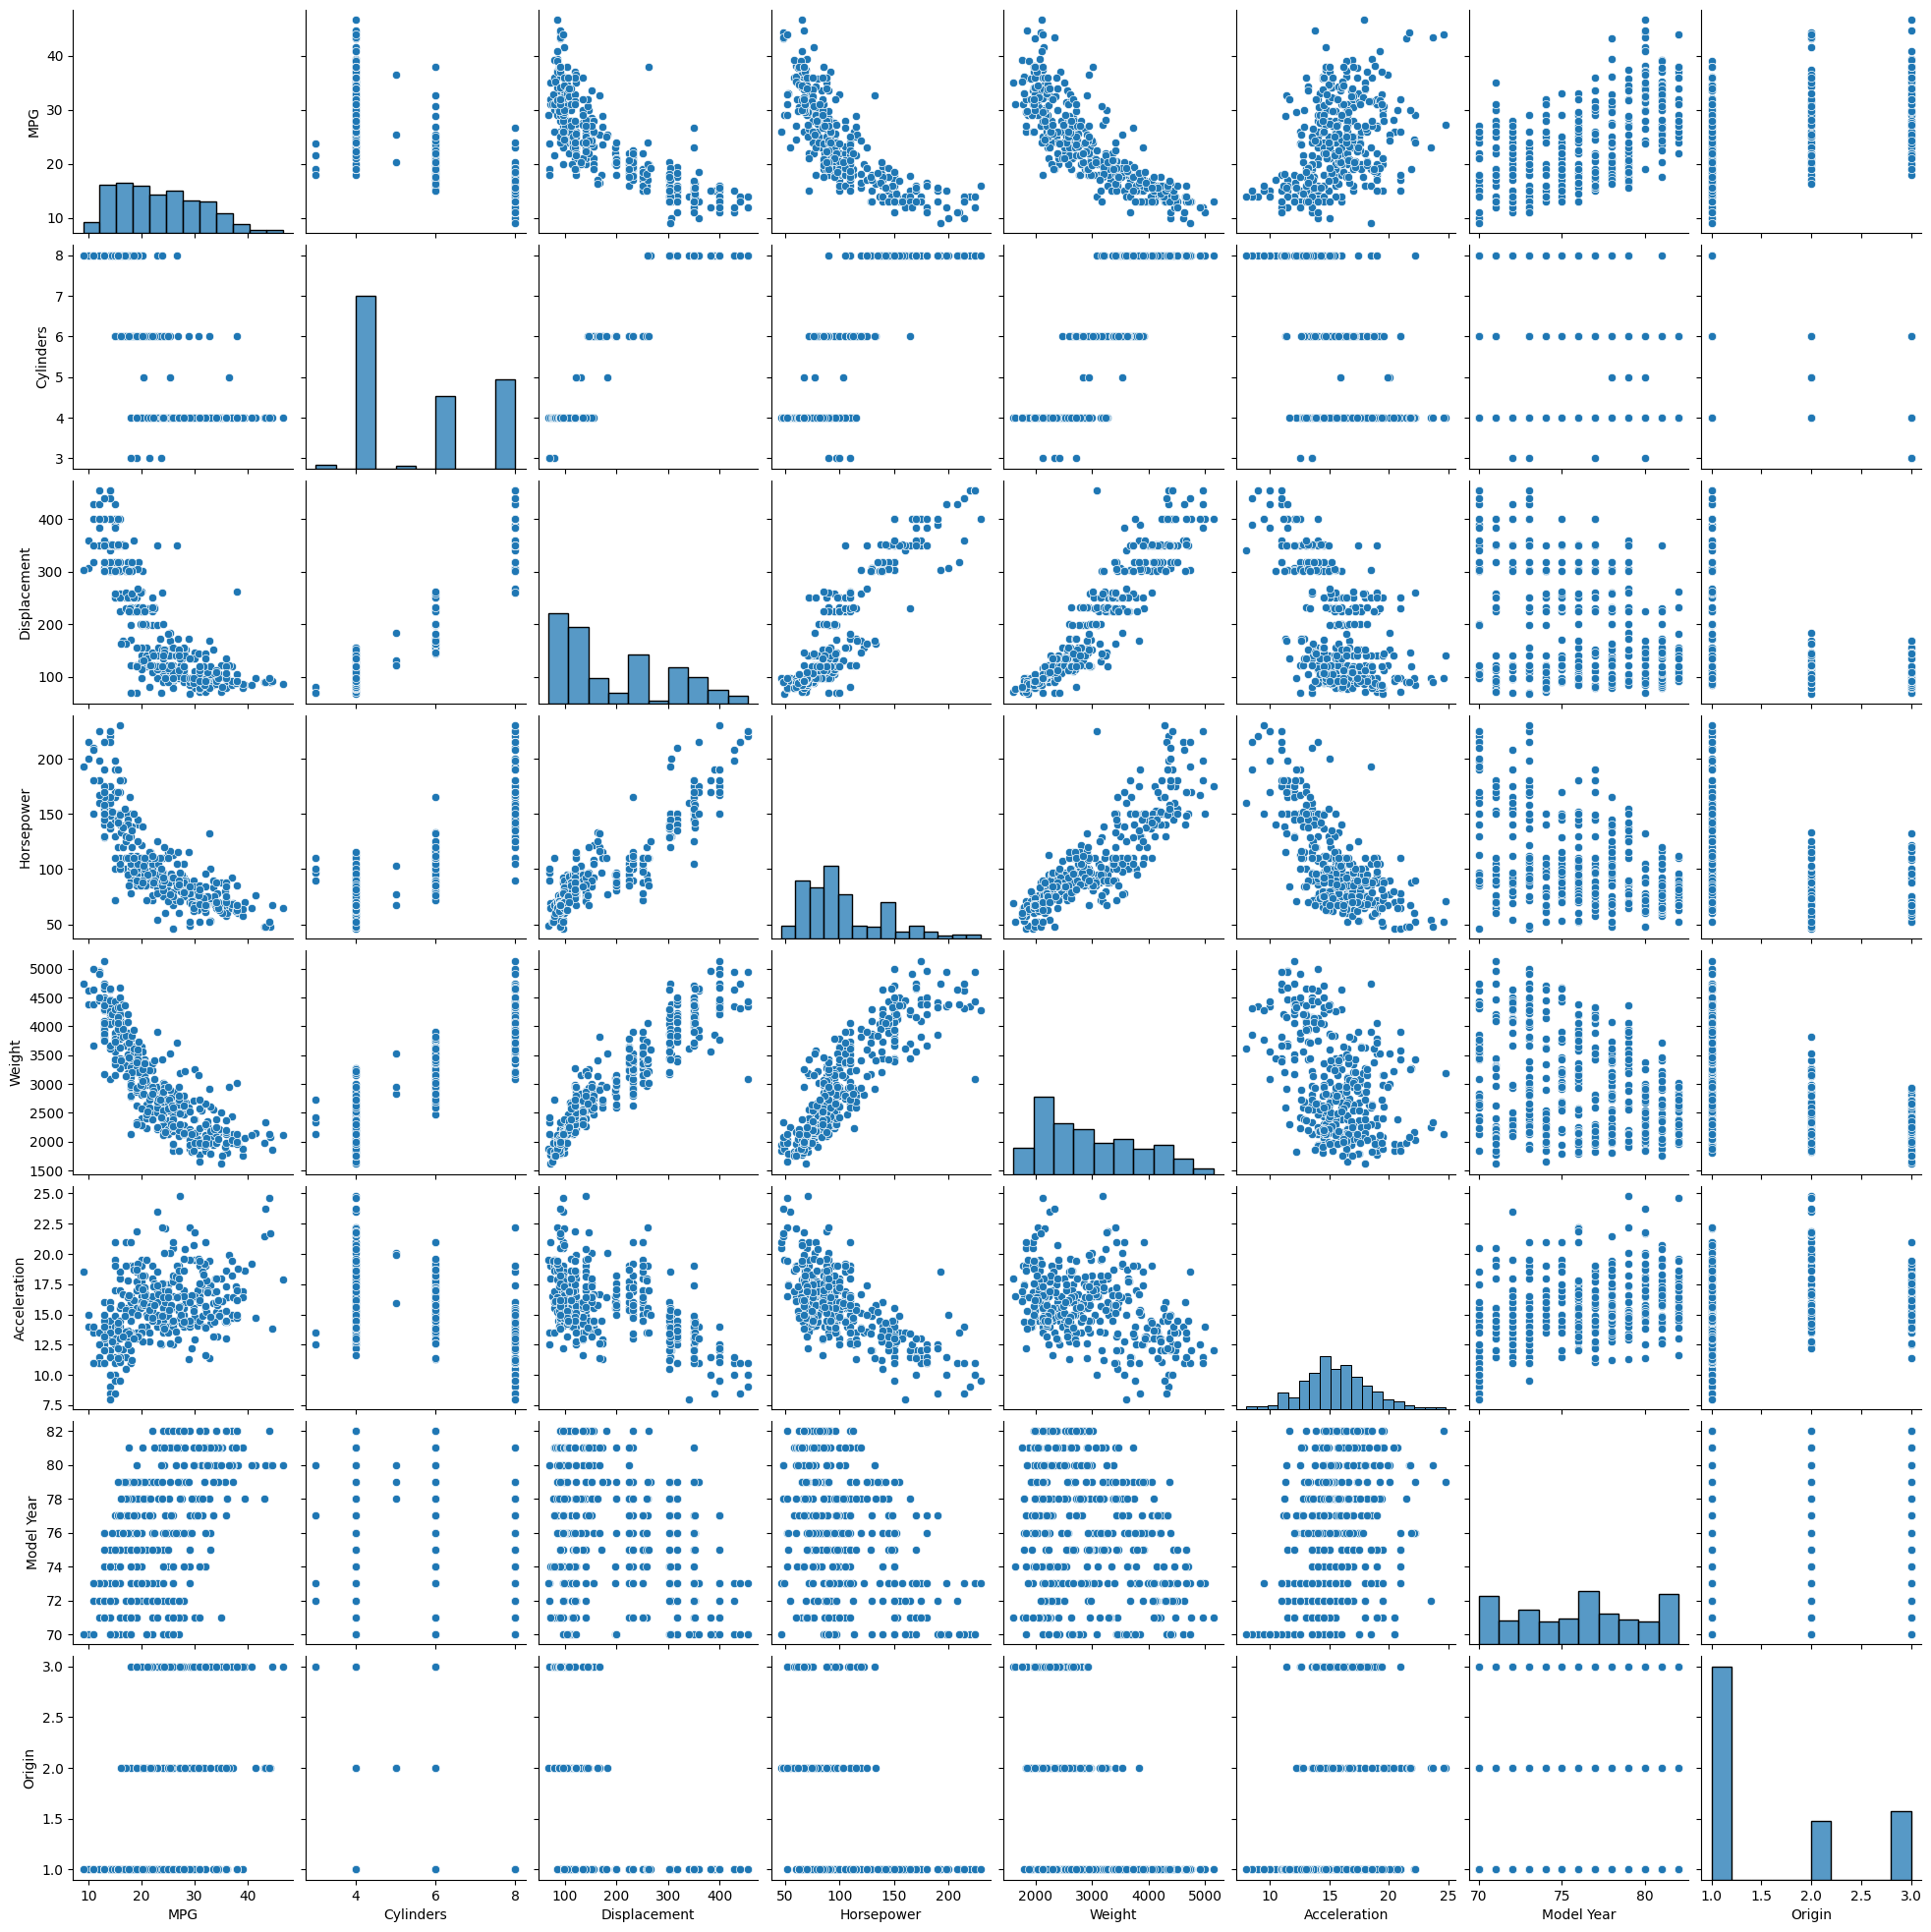

In [193]:
sns.pairplot(data=df)

<Axes: >

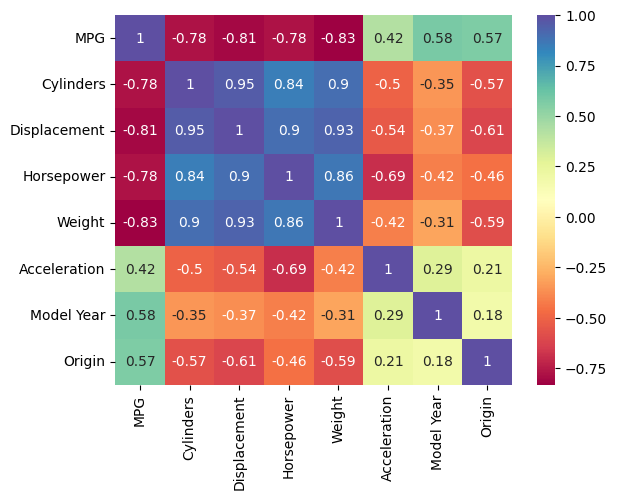

In [194]:
sns.heatmap(df[num_columns].corr(), annot=True, cmap='Spectral')

In [195]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [196]:
df['Origin'].unique()

array([1, 3, 2])

In [197]:
df['Origin'] = df['Origin'].map({1:'USA', 2: 'Europe', 3: 'Japan'})

In [198]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [199]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

In [200]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [201]:
# split dataset

train = df.sample(frac=0.8, random_state=0)
test = df.drop(train.index)

In [202]:
train.shape, test.shape

((314, 10), (78, 10))

In [203]:
train_x = train.copy()
test_x = test.copy()

train_y = train_x.pop('MPG')
test_y = test_x.pop('MPG')

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((314, 9), (78, 9), (314,), (78,))

In [204]:
train_x, train_y

(     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
 146          4          90.0        75.0  2125.0          14.5          74   
 282          4         140.0        88.0  2890.0          17.3          79   
 69           8         350.0       160.0  4456.0          13.5          72   
 378          4         105.0        63.0  2125.0          14.7          82   
 331          4          97.0        67.0  2145.0          18.0          80   
 ..         ...           ...         ...     ...           ...         ...   
 281          6         200.0        85.0  2990.0          18.2          79   
 229          8         400.0       180.0  4220.0          11.1          77   
 150          4         108.0        93.0  2391.0          15.5          74   
 145          4          83.0        61.0  2003.0          19.0          74   
 182          4         107.0        86.0  2464.0          15.5          76   
 
      Europe  Japan  USA  
 146       0      0    

In [205]:
from tensorflow.keras.models import Sequential

In [206]:
# Build Model

# 1 Sequential Model

sequential_model_1 = Sequential([
    Dense(10, activation='relu'),
    Dense(1, activation='relu')
])

# Compile Sequential Model
sequential_model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])



In [207]:
sequential_model_history_1 = sequential_model_1.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
10/10 [==============================] - 2s 46ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 4/10
10/10 [==============================] - 0s 11ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 8/10
10/10 [==============================] - 0s 

In [209]:
# Add normalizer layer

normalizer = tf.keras.layers.Normalization(axis=-1)

In [210]:
# Build Sequential Model

sequential_model_2 = Sequential([
    normalizer,
    Dense(10, activation='relu'),
    Dense(1, activation='relu')
])

# Compile model

sequential_model_2.compile(loss='mae', optimizer='Adam', metrics=['mae'])

In [211]:
sequential_model_history_2 = sequential_model_2.fit(train_x, train_y, epochs=10, validation_data=(test_x,test_y))

Epoch 1/10
10/10 [==============================] - 1s 24ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 23.3105 - mae: 23.3105 - val_loss: 23.9910 - val_mae: 23.9910
Epoch 8/10
10/10 [==============================] - 0s 8ms/st

In [212]:
sequential_model_2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_36 (Dense)            (None, 10)                100       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 130
Trainable params: 111
Non-trainable params: 19
_________________________________________________________________


In [213]:
# Build Model

sequential_model_3 = Sequential([
    normalizer,
    Dense(10, activation='relu'),
    Dense(1)
])

# Compile Model

sequential_model_3.compile(loss='mae', optimizer='Adam')


In [214]:
# Fit Model
sequential_model_history_3 = sequential_model_3.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
10/10 [==============================] - 3s 49ms/step - loss: 708.1213 - val_loss: 671.6173
Epoch 2/10
10/10 [==============================] - 0s 19ms/step - loss: 667.2352 - val_loss: 632.8066
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 628.5166 - val_loss: 595.5966
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 591.1864 - val_loss: 560.2761
Epoch 5/10
10/10 [==============================] - 0s 14ms/step - loss: 556.0683 - val_loss: 526.5054
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 522.2854 - val_loss: 494.6071
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 490.2684 - val_loss: 464.3524
Epoch 8/10
10/10 [==============================] - 0s 14ms/step - loss: 460.1671 - val_loss: 435.4218
Epoch 9/10
10/10 [==============================] - 0s 29ms/step - loss: 431.4916 - val_loss: 407.7979
Epoch 10/10
10/10 [==============================] - 0s 14ms/step - loss:

In [215]:
normalizer(train_x)

<tf.Tensor: shape=(314, 9), dtype=float32, numpy=
array([[  4.,  90.,  75., ...,   0.,   0.,   1.],
       [  4., 140.,  88., ...,   0.,   0.,   1.],
       [  8., 350., 160., ...,   0.,   0.,   1.],
       ...,
       [  4., 108.,  93., ...,   0.,   1.,   0.],
       [  4.,  83.,  61., ...,   0.,   1.,   0.],
       [  4., 107.,  86., ...,   1.,   0.,   0.]], dtype=float32)>

In [216]:
normalizer.adapt(np.array(train_x))

In [217]:
print(normalizer.mean.numpy())

[[5.47770691e+00 1.95318497e+02 1.04869446e+02 2.99025171e+03
  1.55592356e+01 7.58980942e+01 1.78343967e-01 1.97452217e-01
  6.24203861e-01]]


In [218]:
X = np.arange(10)
X

y = np.arange(10, 20,1)
y

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [219]:
train_x.shape

(314, 9)

In [220]:
# Build Model

sequential_model_5 = Sequential([
    normalizer,
    Dense(10,input_shape=(9,)),
    Dense(1)
])

# Compile Model

sequential_model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')



In [221]:
sequential_model_history_5 = sequential_model_5.fit(train_x, train_y, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
10/10 [==============================] - 1s 26ms/step - loss: 20.5960 - val_loss: 14.7510
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 7.7611 - val_loss: 7.0235
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 4.7579 - val_loss: 3.2313
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 3.2712 - val_loss: 3.4615
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 3.1008 - val_loss: 2.9123
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 3.0948 - val_loss: 3.2203
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 2.8816 - val_loss: 2.4397
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 2.9097 - val_loss: 3.1143
Epoch 9/10
10/10 [==============================] - 0s 8ms/step - loss: 3.1293 - val_loss: 2.9187
Epoch 10/10
10/10 [==============================] - 0s 7ms/step - loss: 2.7268 - val_loss: 2.3916


In [222]:
# Lets use sklearn MinMaxScalar

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer


In [223]:
train_x

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [224]:
ct = make_column_transformer(
    (MinMaxScaler(),['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year'])
)

ct.fit(train_x)
train_normal_x = ct.transform(train_x)
test_normal_x = ct.transform(test_x) 

In [225]:
train_normal_x

array([[0.2       , 0.05684755, 0.16201117, 0.13635062, 0.38690476,
        0.33333333],
       [0.2       , 0.18604651, 0.23463687, 0.35548553, 0.55357143,
        0.75      ],
       [1.        , 0.72868217, 0.63687151, 0.8040676 , 0.32738095,
        0.16666667],
       ...,
       [0.2       , 0.10335917, 0.26256983, 0.21254655, 0.44642857,
        0.33333333],
       [0.2       , 0.03875969, 0.08379888, 0.10140361, 0.6547619 ,
        0.33333333],
       [0.2       , 0.10077519, 0.22346369, 0.23345746, 0.44642857,
        0.5       ]])

In [226]:
# Build Model

sequential_model_6 = Sequential([
    Dense(10, activation='relu'),
    Dense(1)
])

# Compile Model

sequential_model_6.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam())

In [227]:
sequential_model_history_6 = sequential_model_6.fit(train_normal_x, train_y, epochs=10, validation_data=(test_normal_x, test_y))

Epoch 1/10
10/10 [==============================] - 1s 20ms/step - loss: 22.8053 - val_loss: 23.4550
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 22.7230 - val_loss: 23.3712
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 22.6344 - val_loss: 23.2801
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 22.5373 - val_loss: 23.1794
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 22.4290 - val_loss: 23.0677
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 22.3095 - val_loss: 22.9441
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 22.1766 - val_loss: 22.8070
Epoch 8/10
10/10 [==============================] - 0s 7ms/step - loss: 22.0318 - val_loss: 22.6560
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 21.8704 - val_loss: 22.4890
Epoch 10/10
10/10 [==============================] - 0s 7ms/step - loss: 21.6886 - val_loss: 22.296

In [230]:
sequential_model_6.evaluate(test_normal_x, test_y)

3/3 [==============================] - 0s 6ms/step - loss: 22.2966


22.296552658081055

In [231]:
preds = sequential_model_6.predict(test_normal_x)

3/3 [==============================] - 0s 6ms/step


In [232]:
preds

array([[2.2256315],
       [2.8332298],
       [3.0641878],
       [1.4796052],
       [1.6503996],
       [2.4439335],
       [2.327738 ],
       [2.5125585],
       [1.7816828],
       [1.6376816],
       [1.6019415],
       [1.3239237],
       [2.1427584],
       [1.4154675],
       [2.3140097],
       [2.1652012],
       [2.0606258],
       [2.2692938],
       [1.8716564],
       [2.3500757],
       [2.460586 ],
       [1.4110141],
       [1.6876998],
       [1.5185711],
       [1.6591198],
       [1.5187724],
       [1.9988977],
       [1.4771842],
       [1.8648353],
       [1.7414734],
       [1.3941987],
       [1.537042 ],
       [1.8292723],
       [1.4238857],
       [1.5641305],
       [2.0131552],
       [1.8314931],
       [1.8442152],
       [1.1604679],
       [1.9314691],
       [1.4357622],
       [1.4111474],
       [2.0146515],
       [1.7078552],
       [1.1149385],
       [1.5179032],
       [1.8367088],
       [1.6376824],
       [1.6807588],
       [1.2825453],


<Axes: >

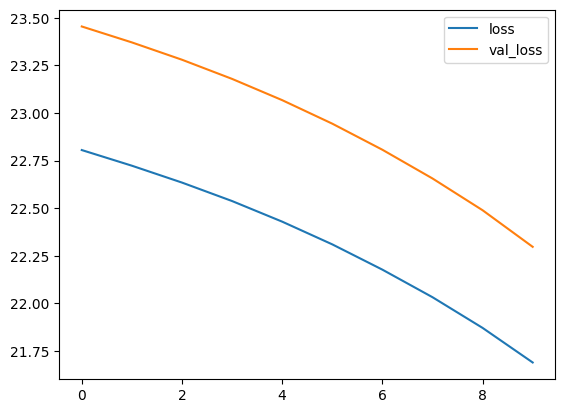

In [238]:
pd.DataFrame(sequential_model_history_6.history).plot()

In [239]:
from tensorflow.keras.utils import plot_model

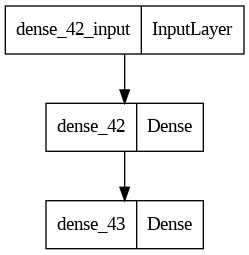

In [242]:
plot_model(sequential_model_6)

In [245]:
tf.keras.models.save_model(sequential_model_6,'/content/sequential_model_6')

In [246]:
saved_model = tf.keras.models.load_model('/content/sequential_model_6')

In [247]:
saved_model.evaluate(test_normal_x, test_y)

3/3 [==============================] - 0s 7ms/step - loss: 22.2966


22.296552658081055

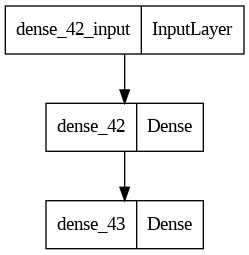

In [249]:
plot_model(saved_model)